# Machine Learning - Clustering

### Table of Contents

#### 1. Importing Libraries and data
#### 2. The elbow technique
#### 3. K-means clustering

### 1. Importing Libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import pylab as pl

In [2]:
# This allows the graphs created to be displayed in your notebook without the need to call them

%matplotlib inline

In [3]:
path = r'C:/users/jonsa/Documents/Career Foundry Tasks/Achievement 6'

In [4]:
df = pd.read_csv(os.path.join(path, 'Prepared Data', 'airbnb_clean_2.csv'))

C:\Users\jonsa\AppData\Local\Temp\ipykernel_21496\233133718.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(path, 'Prepared Data', 'airbnb_clean_2.csv'))


### 2. The elbow technique

In [5]:
df.head()

,Unnamed: 0.1,Unnamed: 0,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,city,state
0,0,0,38585,Charming Victorian home - twin beds + breakfast,165529,NaN,28804,35.65146,-82.62792,Private room,60,1,138,2020-02-16,1.14,1,0,Asheville,North Carolina
1,1,1,80905,French Chic Loft,427027,NaN,28801,35.59779,-82.55540,Entire home/apt,470,1,114,2020-07-09,1.03,11,288,Asheville,North Carolina
2,2,2,108061,Walk to stores/parks/downtown. Fenced yard/Pet...,320564,NaN,28801,35.60670,-82.55563,Entire home/apt,75,30,89,2019-11-30,0.81,2,298,Asheville,North Carolina
3,3,3,155305,Cottage! BonPaul + Sharky's Hostel,746673,NaN,28806,35.57864,-82.59578,Entire home/apt,90,1,267,2020-09-22,2.39,5,0,Asheville,North Carolina
4,4,4,160594,Historic Grove Park,769252,NaN,28801,35.61442,-82.54127,Private room,125,30,58,2015-10-19,0.52,1,0,Asheville,North Carolina


In [6]:
df2 = df[['price', 'minimum_nights', 'number_of_reviews', 'availability_365']]

In [7]:
scaler = StandardScaler()
segmentation_std = scaler.fit_transform(df2)

In [8]:
df2.dtypes

price                int64
minimum_nights       int64
number_of_reviews    int64
availability_365     int64
dtype: object

In [9]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [10]:
score = [kmeans[i].fit(df2).score(df2) for i in range (len(kmeans))]

score

[-9950448015.111633,
 -6363545173.425154,
 -3649089766.2165184,
 -3055516976.450359,
 -2601688046.5958853,
 -2198124975.1856427,
 -1845034231.43565,
 -1646306585.3326197,
 -1486526439.9921398]

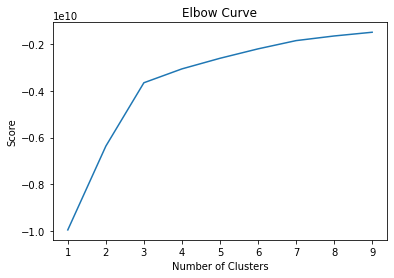

In [11]:
#Plotting the elbow curve

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

We can see above that the line starts to flatten out after 3 clusters. This means that the optimal count for our clusters is 3.

### 3. k-means clustering

In [12]:
#Create the k-means object

kmeans = KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, random_state=None, tol=0.0001, verbose=0) 

In [13]:
kmeans.fit(df2)

KMeans(n_clusters=3)

In [14]:
df2['clusters'] = kmeans.fit_predict(df2)

C:\Users\jonsa\AppData\Local\Temp\ipykernel_21496\3385428573.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['clusters'] = kmeans.fit_predict(df2)


In [15]:
df2.head()

,price,minimum_nights,number_of_reviews,availability_365,clusters
0,60,1,138,0,2
1,470,1,114,288,1
2,75,30,89,298,0
3,90,1,267,0,2
4,125,30,58,0,2


In [16]:
df2['clusters'].value_counts()

2    119232
0     77284
1     19310
Name: clusters, dtype: int64

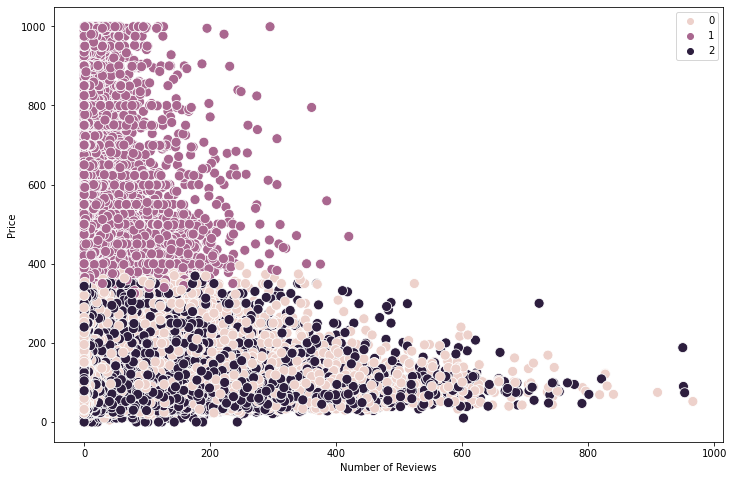

In [17]:
#Plotting the clutsers for "number_of_reviews" and "price"

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df2['number_of_reviews'], y=df2['price'], hue=kmeans.labels_, s=100)
ax.grid(False) #Removing the background from the grid
plt.xlabel('Number of Reviews')
plt.ylabel('Price')
plt.show()

C:\Users\jonsa\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


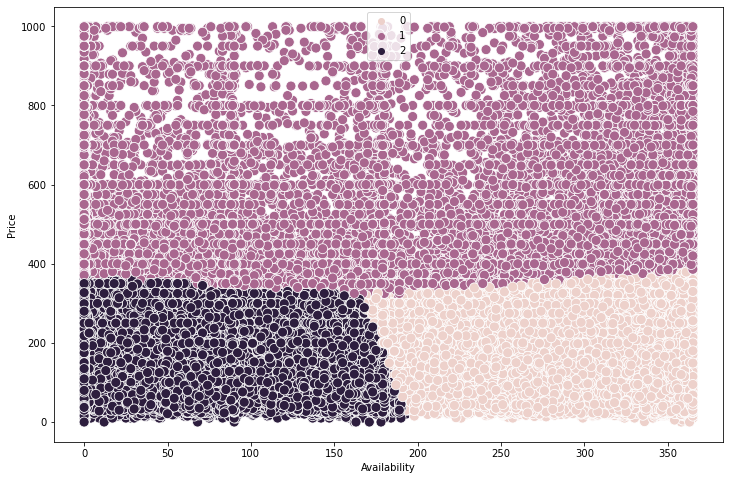

In [18]:
#Plotting the clutsers for "availability_365" and "price"

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df2['availability_365'], y=df2['price'], hue=kmeans.labels_, s=100)
ax.grid(False) #Removing the background from the grid
plt.xlabel('Availability')
plt.ylabel('Price')
plt.show()

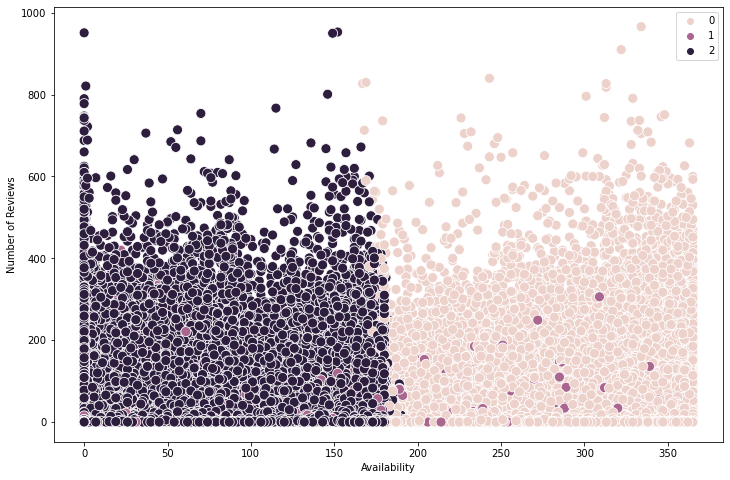

In [19]:
#Plotting the clutsers for "availability_365" and "number_of_reviews"

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df2['availability_365'], y=df2['number_of_reviews'], hue=kmeans.labels_, s=100)
ax.grid(False) #Removing the background from the grid
plt.xlabel('Availability')
plt.ylabel('Number of Reviews')
plt.show()

In [20]:
df.loc[df['clusters'] == 2, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'purple'
df.loc[df['clusters'] == 0, 'cluster'] = 'pink'

KeyError: 'clusters'

In [ ]:
df.groupby('cluster').agg({'minimum_nights':['mean', 'median'],
                          'number_of_reviews':['mean', 'median'],
                          'price':['mean', 'median']})

As we can see above, the number of reviews and price have a relatively strong negative correlation. On a listing that has more reviews, the price is generally lower while those with more reviews are more expensive. We can also see that the minimum_nights has no real impact on the number of reviews or the price. Generally speaking, the pink clusters are the least ideal while the purple are the most ideal with dark purple only trailing behind by a small amount. 